# Aprendizaje por Refuerzo: El Problema del Bandido

## Introducción
El problema del bandido es un escenario clásico en aprendizaje por refuerzo. Un agente tiene varias opciones (bandits o brazos de una máquina tragamonedas) y debe elegir cuál explorar para maximizar sus ganancias. En este caso, el anunciante está eligiendo entre dos opciones de publicidad, A y B.

Cada opción tiene una probabilidad desconocida de éxito $P_A$ y $P_B$, y el objetivo es descubrir cuál es más rentable en función del número de clics recibidos.


## Formulación del Problema

1. **Anuncio a mostrar**: En cada ronda $i$, el anunciante selecciona una publicidad $E_i \in \{A, B\}$ para el $i$-ésimo cliente.
   
2. **Resultados de los clics**: Si el cliente hace clic, el valor de $X_i = 1$, y si no hace clic, $X_i = 0$. Esto se modela como una variable aleatoria Bernoulli con probabilidad $P_{E_i}$, es decir, $$X_i \sim \text{Bernoulli}(P_{E_i}).$$

3. **Objetivo**: El objetivo es definir una estrategia que maximice las ganancias esperadas:
   $$
   \lim_{n \to \infty} \frac{X_1 + \dots + X_n}{n} \to \max(P_A, P_B)
   $$
   También queremos maximizar la ganancia en un horizonte finito de tiempo:
   $$
   \max E_i \text{ estrategias } E[X_1 + \dots + X_n]
   $$


## Estrategia Epsilon-**Greedy**

Para abordar este problema, se propone la estrategia **epsilon-greedy**:

1. **Exploración**: Se introduce un parámetro $\epsilon > 0$ que controla cuánto se explorará. La exploración ocurre con probabilidad $\epsilon$, eligiendo aleatoriamente entre A y B.
   
2. **Explotación**: Con probabilidad $1 - \epsilon$, se elige la mejor opción conocida hasta ese momento, es decir, la publicidad con el mejor rendimiento en términos de clics.


### Proceso:
- Fijamos $E_1 = A$ y $E_2 = B$ para comenzar.
- A partir del cliente $i \geq 3$, se elige:
  - Con probabilidad $1 - \epsilon$, la publicidad que ha mostrado el mejor rendimiento hasta ahora.
  - Con probabilidad $\epsilon$, se elige la otra opción para seguir explorando.


### Pregunta 1: ¿Cuál es el límite de $(X_1 + \dots + X_n)/n$?
A medida que $n \to \infty$, la proporción de clics debería converger hacia la mayor probabilidad entre $P_A$ y $P_B$, es decir, $\max(P_A, P_B)$.


### Pregunta 2: Simulaciones con Diferentes Valores de $\epsilon$
Fijamos $n = 1000$, $P_A = 0.4$ y $P_B = 0.6$. Realizaremos simulaciones con diferentes valores de $\epsilon$.


### Código de Simulación:

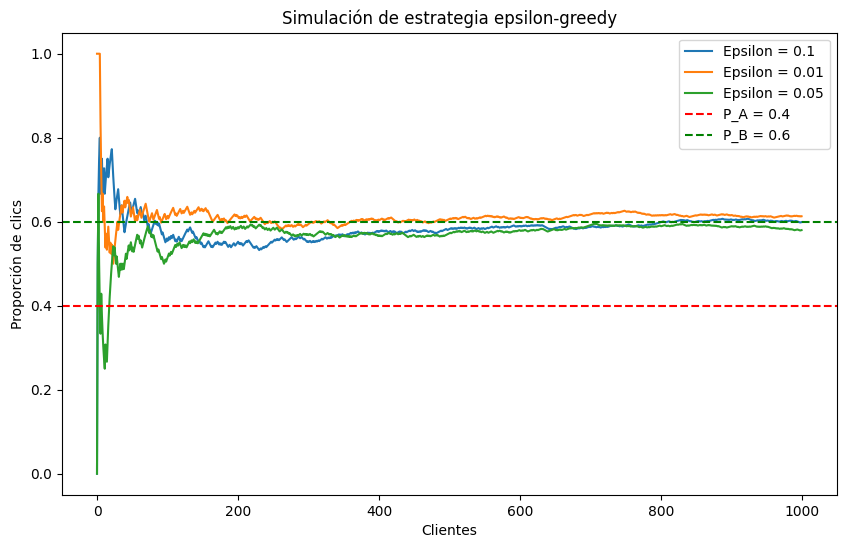

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
n = 1000
P_A = 0.4
P_B = 0.6

# Función para simular el bandit problem con epsilon-greedy
def simulate_epsilon_greedy(n, P_A, P_B, epsilon):
    X = np.zeros(n)
    clicks_A = 0
    clicks_B = 0
    counts_A = 0
    counts_B = 0

    for i in range(n):
        if i < 2:  # Exploración inicial
            E = 'A' if i == 0 else 'B'
        else:
            if np.random.rand() < epsilon:  # Exploración
                E = 'A' if np.random.rand() < 0.5 else 'B'
            else:  # Explotación
                E = 'A' if clicks_A / max(1, counts_A) > clicks_B / max(1, counts_B) else 'B'

        # Generar el clic basado en la elección
        if E == 'A':
            X[i] = 1 if np.random.rand() < P_A else 0
            clicks_A += X[i]
            counts_A += 1
        else:
            X[i] = 1 if np.random.rand() < P_B else 0
            clicks_B += X[i]
            counts_B += 1

    return np.cumsum(X) / np.arange(1, n+1)

# Simulaciones con diferentes valores de epsilon
epsilons = [0.1, 0.01, 0.05]
plt.figure(figsize=(10, 6))

for epsilon in epsilons:
    trajectory = simulate_epsilon_greedy(n, P_A, P_B, epsilon)
    plt.plot(trajectory, label=f'Epsilon = {epsilon}')

# Etiquetas y leyenda
plt.axhline(P_A, color='r', linestyle='--', label='P_A = 0.4')
plt.axhline(P_B, color='g', linestyle='--', label='P_B = 0.6')
plt.xlabel('Clientes')
plt.ylabel('Proporción de clics')
plt.legend()
plt.title('Simulación de estrategia epsilon-greedy')
plt.show()

## Mejora del Algoritmo

Una variante de esta estrategia sería hacer que $\epsilon$ disminuya con el tiempo, permitiendo explorar al principio y explotar al final. Algunas posibles secuencias para $\epsilon_i$ incluyen:

- $\epsilon_i = \frac{1}{i^2}$
- $\epsilon_i = \frac{1}{\sqrt{i}}$
- $\epsilon_i = \frac{1}{\log(i)}$

## Simulación para Secuencias de $\epsilon_i$

El código se modifica para que $\epsilon$ cambie con el índice $i$ según las funciones propuestas.

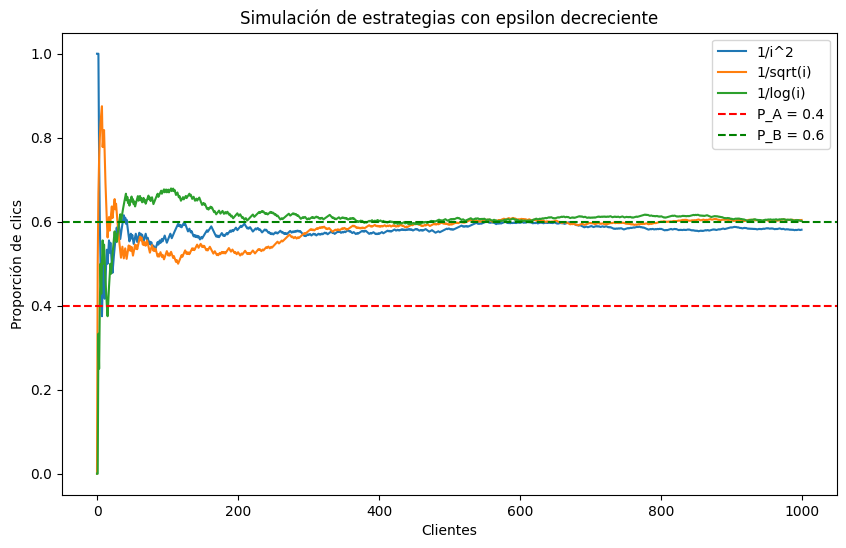

In [ ]:
# Función para simular el bandit problem con secuencias de epsilon decrecientes
def simulate_epsilon_decreasing(n, P_A, P_B, epsilon_func):
    X = np.zeros(n)
    clicks_A = 0
    clicks_B = 0
    counts_A = 0
    counts_B = 0

    for i in range(n):
        epsilon = epsilon_func(i + 1)  # Epsilon depende de i
        if i < 2:  # Exploración inicial
            E = 'A' if i == 0 else 'B'
        else:
            if np.random.rand() < epsilon:  # Exploración
                E = 'A' if np.random.rand() < 0.5 else 'B'
            else:  # Explotación
                E = 'A' if clicks_A / max(1, counts_A) > clicks_B / max(1, counts_B) else 'B'

        # Generar el clic basado en la elección
        if E == 'A':
            X[i] = 1 if np.random.rand() < P_A else 0
            clicks_A += X[i]
            counts_A += 1
        else:
            X[i] = 1 if np.random.rand() < P_B else 0
            clicks_B += X[i]
            counts_B += 1

    return np.cumsum(X) / np.arange(1, n+1)

# Funciones para epsilon decreciente
epsilon_funcs = [
    lambda i: 1 / i**2,
    lambda i: 1 / np.sqrt(i),
    lambda i: 1 / np.log(i + 1)  # Evitar log(0)
]

labels = ["1/i^2", "1/sqrt(i)", "1/log(i)"]

plt.figure(figsize=(10, 6))

for epsilon_func, label in zip(epsilon_funcs, labels):
    trajectory = simulate_epsilon_decreasing(n, P_A, P_B, epsilon_func)
    plt.plot(trajectory, label=label)

# Etiquetas y leyenda
plt.axhline(P_A, color='r', linestyle='--', label='P_A = 0.4')
plt.axhline(P_B, color='g', linestyle='--', label='P_B = 0.6')
plt.xlabel('Clientes')
plt.ylabel('Proporción de clics')
plt.legend()
plt.title('Simulación de estrategias con epsilon decreciente')
plt.show()


## Pregunta 3: Simulación para Encontrar el Mejor $\epsilon$

Para $N = 100$, $P_A = 0.4$ y $P_B = 0.6$, podemos realizar 10,000 simulaciones para determinar el valor óptimo de $\epsilon$ que maximiza $E[X_1 + \dots + X_n]$.

Este código se puede adaptar fácilmente, variando los valores de $\epsilon$ y calculando la media de los resultados en múltiples simulaciones.

## Conclusión


El problema del bandido refleja la necesidad de equilibrar la exploración de nuevas opciones y la explotación de las conocidas. Estrategias como epsilon-greedy y sus variantes permiten resolver el problema de manera eficiente, optimizando las recompensas tanto a corto como a largo plazo.

# Aprendizaje Markoviano: Piedra-Papel-Tijeras

## Introducción

En este escenario, dos jugadores participan en el clásico juego de piedra-papel-tijeras (Pierre-Feuille-Ciseaux). Los jugadores basan sus decisiones en el historial de jugadas previas. El objetivo es implementar un algoritmo de aprendizaje por refuerzo que permita a uno o ambos jugadores mejorar su desempeño basándose en las decisiones anteriores.

Cada jugador toma decisiones secuenciales y tiene en cuenta el comportamiento pasado del adversario.


### Notaciones:

- $( X_t \in \{\text{Pi}, \text{Fe}, \text{Ci}\} )$: La elección del jugador en el instante $ t $.
- $( Y_t \in \{\text{Pi}, \text{Fe}, \text{Ci}\} )$: La elección del adversario en el instante $t$.
  
El historial hasta el instante $t $ está dado por una lista de decisiones de ambos jugadores:
$$
\text{Historial} = [[X_1, Y_1], [X_2, Y_2], \dots, [X_T, Y_T]]
$$

El adversario puede tener una memoria corta y tomar decisiones de manera parcialmente aleatoria. Esto se modela con la función:

$$
Y_{t+1} = \phi(X_{t-1}, X_t, Y_{t-1}, Y_t, A_{t+1})
$$

donde $A_{t+1} $ es una variable aleatoria que introduce aleatoriedad en las decisiones.


## Tabla de Ganancias
El juego está basado en esta tabla de pagos:  
<div align="center">

|      | Pi  | Fe  | Ci  |
|------|-----|-----|-----|
| **Pi** | 0   | 1   | -1  |
| **Fe** | -1  | 0   | 1   |
| **Ci** | 1   | -1  | 0   |

</div>
El objetivo del aprendizaje es maximizar las ganancias del jugador  `X` con respecto a `Y`, considerando que `Y` puede basarse en patrones históricos y comportamientos predecibles.


## Algoritmo de Aprendizaje

El jugador \( X \) toma decisiones basándose en una estrategia de aprendizaje, que puede dividirse en dos fases:
1. **Exploración**: El jugador toma decisiones al azar entre {Pi, Fe, Ci}.
2. **Explotación**: El jugador selecciona la mejor opción según las estadísticas obtenidas de jugadas pasadas, que muestran cómo se ha comportado \( Y \) en situaciones similares.


### Estrategia de Decisión:

- Con probabilidad $ \epsilon $, el jugador explora (elige aleatoriamente).
- Con probabilidad $ 1 - \epsilon $, el jugador explota (elige la opción que ha dado mejores resultados en el pasado).


### Implementación

A continuación, implementamos la función `JoueurApprentissage` que toma como entrada el historial de jugadas, el parámetro \( \epsilon \) y el número de jugador, para devolver la siguiente jugada.


### Código

In [ ]:
import numpy as np
import random

# Función para calcular la siguiente jugada basándose en aprendizaje por refuerzo
def JoueurApprentissage(Historique, epsilon, i):
    # Si es la primera jugada, elige aleatoriamente entre Pi, Fe, Ci
    if len(Historique) < 2:
        return random.choice(['Pi', 'Fe', 'Ci'])

    # Con probabilidad epsilon exploramos
    if random.random() < epsilon:
        return random.choice(['Pi', 'Fe', 'Ci'])

    # Explotación: basándonos en el historial, elegimos la mejor opción
    # Historial de las últimas jugadas (X_t-2, X_t-1) y (Y_t-2, Y_t-1)
    pase_reciente = Historique[-2:]  # Tomamos las dos últimas jugadas

    # Contabilizamos las jugadas del adversario cuando se ha jugado la misma secuencia
    freq_pi, freq_fe, freq_ci = 0, 0, 0
    for jugada in Historique[:-1]:
        if jugada[0] == pase_reciente[0][0] and jugada[1] == pase_reciente[0][1]:
            if jugada[1] == 'Pi':
                freq_pi += 1
            elif jugada[1] == 'Fe':
                freq_fe += 1
            else:
                freq_ci += 1

    # Tomamos la jugada con mayor frecuencia
    if freq_pi > freq_fe and freq_pi > freq_ci:
        return 'Fe'  # Contra Pi, lo mejor es jugar Fe
    elif freq_fe > freq_ci:
        return 'Ci'  # Contra Fe, lo mejor es jugar Ci
    else:
        return 'Pi'  # Contra Ci, lo mejor es jugar Pi

# Simulación de partidas
def SimularPartida(n, epsilon):
    Historique = []
    for t in range(n):
        jugador_X = JoueurApprentissage(Historique, epsilon, 0)
        jugador_Y = random.choice(['Pi', 'Fe', 'Ci'])  # El adversario juega aleatoriamente
        Historique.append([jugador_X, jugador_Y])
    return Historique

N_RONDAS = 1000
# Ejecutamos una simulación con 1000 rondas y epsilon = 0.1
historique = SimularPartida(N_RONDAS, 0.1)

# Imprimir las primeras jugadas
print(historique[:10])

[['Pi', 'Fe'], ['Ci', 'Pi'], ['Ci', 'Ci'], ['Fe', 'Fe'], ['Pi', 'Ci'], ['Ci', 'Fe'], ['Pi', 'Ci'], ['Ci', 'Pi'], ['Pi', 'Fe'], ['Fe', 'Fe']]


### Explicación del Código
- `JoueurApprentissage`: Esta función es responsable de decidir la próxima jugada del jugador `X`. Usa una estrategia
`ϵ-greedy`, en la que algunas veces explora y otras veces explota la información del historial.
- `SimularPartida`: Simula una serie de jugadas entre dos jugadores, donde `Y` juega aleatoriamente y `X` aprende a medida que avanza la partida.

Gráficas de Resultados
Podemos también trazar la proporción de jugadas que elige el jugador `X` a lo largo del tiempo para visualizar cómo su estrategia evoluciona.

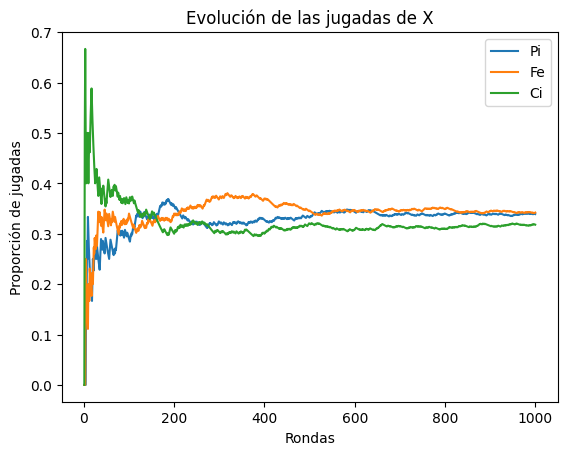

In [ ]:
import matplotlib.pyplot as plt

def plot_evolucion(Historique):
    n = len(Historique)
    pi_count = [0]
    fe_count = [0]
    ci_count = [0]

    for i in range(1, n):
        pi_count.append(pi_count[-1] + (1 if Historique[i][0] == 'Pi' else 0))
        fe_count.append(fe_count[-1] + (1 if Historique[i][0] == 'Fe' else 0))
        ci_count.append(ci_count[-1] + (1 if Historique[i][0] == 'Ci' else 0))

    plt.plot(np.arange(1, n+1), np.array(pi_count) / np.arange(1, n+1), label='Pi')
    plt.plot(np.arange(1, n+1), np.array(fe_count) / np.arange(1, n+1), label='Fe')
    plt.plot(np.arange(1, n+1), np.array(ci_count) / np.arange(1, n+1), label='Ci')
    plt.xlabel('Rondas')
    plt.ylabel('Proporción de jugadas')
    plt.legend()
    plt.title('Evolución de las jugadas de X')
    plt.show()

# Graficar la evolución
plot_evolucion(historique)


## Conclusión

El aprendizaje markoviano en el juego de piedra-papel-tijeras permite a los jugadores mejorar su desempeño a medida que utilizan la información del historial. Usando una estrategia `ϵ-greedy`, el jugador `X` puede explorar nuevas estrategias y, al mismo tiempo, explotar las mejores respuestas conocidas frente a su adversario.

# Aprendizaje de X cuando Y juega i.i.d. (X apprend / Y joue i.i.d.)


## Introducción

En esta sección, se explora cómo el jugador $ X $ puede aprender cuando su oponente $Y $ juega de manera independiente e idénticamente distribuida `i.i.d.`, es decir, $ Y $ no está adaptando su estrategia y juega aleatoriamente con probabilidades fijas para cada una de las opciones `{Pi, Fe, Ci}`.


### Suposiciones

El jugador $ Y $ juega cada opción con probabilidades constantes:
- $ P(\text{Pi}) = p $
- $ P(\text{Fe}) = q $
- $ P(\text{Ci}) = r $

El jugador $ X $ trata de aprender la mejor respuesta a esta distribución fija de jugadas.


### Algoritmo de Aprendizaje

El jugador $ X $ utiliza un enfoque de **epsilon-greedy** para equilibrar la exploración y la explotación:
1. **Exploración**: Con probabilidad $ \epsilon $ $ X $ explora nuevas jugadas al azar.
2. **Explotación**: Con probabilidad $ 1 - \epsilon $, $ X $ elige la mejor jugada en función de las observaciones pasadas de $ Y $.


### Código

[['Fe', 'Pi'], ['Fe', 'Pi'], ['Fe', 'Fe'], ['Fe', 'Pi'], ['Ci', 'Pi'], ['Fe', 'Ci'], ['Fe', 'Pi'], ['Pi', 'Pi'], ['Fe', 'Ci'], ['Fe', 'Pi']]


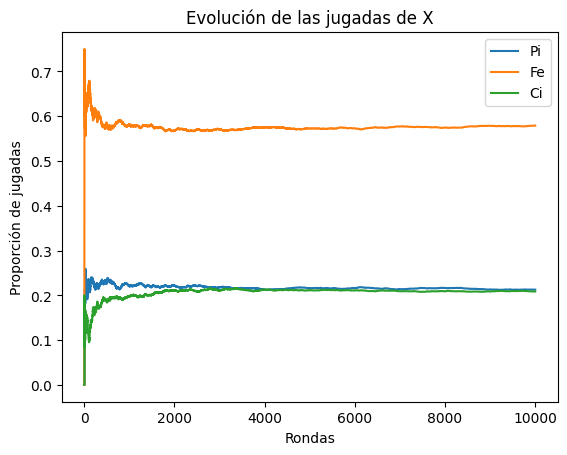

In [ ]:
import numpy as np
import random

# Función para simular el juego entre X que aprende y Y que juega i.i.d.
def SimularPartida_X_apprend_Y_iid(n, epsilon, p, q, r):
    Historique = []
    for t in range(n):
        jugador_Y = random.choices(['Pi', 'Fe', 'Ci'], weights=[p, q, r])[0]
        jugador_X = JoueurApprentissage(Historique, epsilon, 0)
        Historique.append([jugador_X, jugador_Y])
    return Historique

# Probabilidades fijas de Y (i.i.d.)
p = 0.6  # Pi
q = 0.2  # Fe
r = 0.2  # Ci

N_RONDAS = 10000
# Ejecutamos una simulación con 1000 rondas y epsilon = 0.1
historique = SimularPartida_X_apprend_Y_iid(N_RONDAS, 0.1, p, q, r)

# Imprimir las primeras jugadas
print(historique[:10])

# Graficar la evolución de las jugadas de X
plot_evolucion(historique)

## Explicación del Código


- `SimularPartida_X_apprend_Y_iid`: Simula una serie de jugadas entre `X`, que aprende usando una estrategia `ϵ-greedy`, y `Y`, que juega de forma independiente con probabilidades fijas (`p`, `q`, `r` para `'Pi'`, `'Fe'`, `'Ci'`).
- Parámetros de `Y`: `p = 0.6`, `q = 0.2`, `r = 0.2`, para sesgar las jugadas de `Y` y ver cómo `X` adapta su estrategia.
- `N_RONDAS = 10000`, `epsilon = 0.1`: `X` explora un 10% de las veces y explota el resto.
- Visualización (`plot_evolucion`): Permite observar cómo evoluciona la estrategia de `X` a medida que aprende de las jugadas de `Y`.
**bold text**